### College of Computing and Informatics, Drexel University
### INFO 213: Data Science Programming II, Summer 2018
---

## Final Project Report

## Project Title: Identifying Breast Cancer

## Student(s): Raj B. Patel & Linh Mai

#### Date: 08/11/18
---

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, models, and final findings.)* 

The purpose of this project is to see if a custom implemtation of KNN would outperform an implementation of KNN from the Scikit Learn library. The data is made of several features: ID Number, Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses, and Class. There is missing data to account for. Uniformity of Cell Shape and Uniformity of Cell Size are two highly correlated features. At the end, the custom KNN implementation ended up performing better by a small margin. 

### 1. Introduction
---
*(Introduce the project, describe the objectives, and highlight the key findings.)* 

For this project, we are planning to use the Breast Cancer Wisconsin Dataset from the University of California, Irvine. According to the Susan G. Komen Foundation, 1 in 8 women will be diagnosed of invasive breast cancer. The dataset offers the opportunity to classify whether or not someone has breast cancer based on 9 true features. The objective for this project is to identify the best K-Nearest Neighbor approach to identify breast cancer with the best accuracy. Hopefully, the results of this projects can be of use to others. 

### The specific objectives will be the folllowing:
### - Adding the feature names to the data set
### - Removing the ID column values
### - Rename the Class column
### - Filling in missing data
### - Create a KNN classifier from scratch
### - Compare & vizualize different distance methods
### - Evaluate that model
### - Use the Scikit Learn package as a KNN classifier
### - Compare & vizualize different distance methods
### - Evaluate that model 

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project.)*

The problem to be addressed with this dataset is to identify which KNN implementation has the best accuracy, and speculate why. The stakeholders for this problem would be anyone who is interested in their health as breast cancer can happen to both men and women. Since this problem affects many people across the world, everyone can possibly benefit from this project, even if it just to increase their awareness. 

### 3. Data Sets
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

The data set used for this project is from the University of California, Irvine's Center for Machine Learning and Intelligent Systems. It was collected by Dr. William H. Wolberg from the University of Wisconsin, Clinical Sciences Center in Madison, Wisconsin. This data was collected in 1995. The format of this data is a text file. There is separate metadata for feature labels. 

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29

### 4. Preparation
---
*(Describe and present any code and methods for cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis.)*

In [1]:
#import libraries
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from math import sqrt
from matplotlib import style
from matplotlib import cm as cm
from collections import Counter
import random

/Users/RajPatel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#read & display data set
df = pd.read_csv('../DataSets/breast-cancer-wisconsin.txt')
df.head()

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# 2 is benign, 4 is malignant
# change 2,4 to 0,1 for ease of understanding
cleanup_nums = {"Class":  {2: 0, 4: 1}}
df.replace(cleanup_nums, inplace=True)
df.head(5)

,ID Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [4]:
#switch out missing data
df = df.replace('?', df.replace(['?'], [None]))

In [5]:
#check to see the number of missing values per feature
for row in df:
    value = df[row].isnull().sum()
    print("There are", value, " missing values in column",row)

There are 0  missing values in column ID Number
There are 0  missing values in column Clump Thickness
There are 0  missing values in column Uniformity of Cell Size
There are 0  missing values in column Uniformity of Cell Shape
There are 0  missing values in column Marginal Adhesion
There are 0  missing values in column Single Epithelial Cell Size
There are 16  missing values in column Bare Nuclei
There are 0  missing values in column Bland Chromatin
There are 0  missing values in column Normal Nucleoli
There are 0  missing values in column Mitoses
There are 0  missing values in column Class


In [6]:
#Drop null values
df = df.dropna()

In [7]:
#ID column is of no help
df.drop(['ID Number'], 1, inplace = True)

### 5. Exploration and Visualization
---
*(Describe and present any code and methods for exploring and visualizing the data by analyzing its statistics and correlations between different features.)*

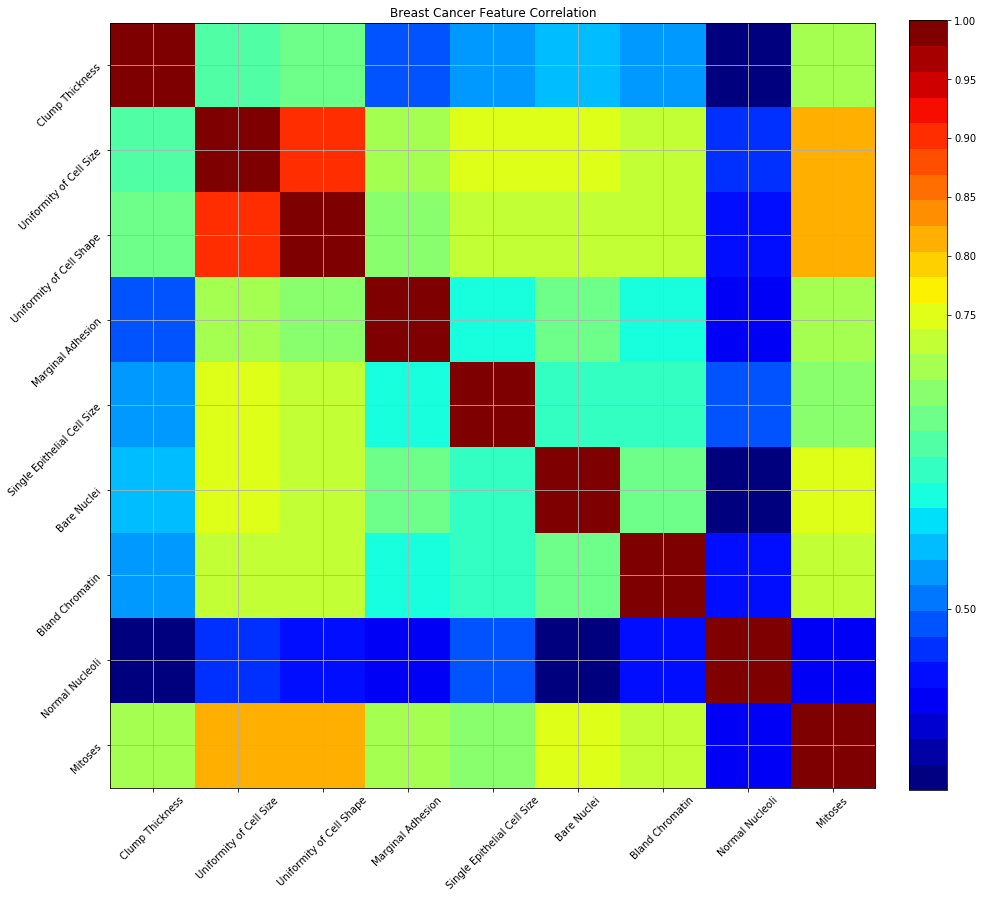

In [10]:
#correlation matrix

#Configure plot
fig = plt.figure(figsize = (15,30))
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Feature Correlation')
labels=["ID Number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]
ax1.set_xticklabels(labels,fontsize=10, rotation = 45)
ax1.set_yticklabels(labels,fontsize=10, rotation = 45)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax,fraction=0.046, pad=0.04, ticks=[0,.25,.5,.75,.8,.85,.90,.95,1])
plt.show()


### 6. Modeling and Evaluation
---
*(Describe and present the predictive models built on the data and evaluate the performance of the models for solving the problem)*

### For each KNN implementation, 1-20 neighbors are tested using 3 distance methods: Euclidean, Minowski, and Manhattan.

# Using Scikit Learn

In [11]:
#X = training data
X = np.array(df.drop(['Class'],1))
#y = testing data
y = np.array(df['Class'])

In [12]:
#split data set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.4)

### KNN Function Utilizing Minowski Distance

In [87]:
#Run KNN Classifier using Minowski distance from 1-20 neighbors
k_range = range(1,21)
scores_a = []
for k in k_range:
    # set classifier and # of neighbors
    # default distance method is Minowski
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    #fit data with classifier
    clf.fit(X_train, y_train)
    #check and append accuracy score
    scores_a.append(clf.score(X_test, y_test))
print("The maximum calculated accuracy is",max(scores_a),"." )

The maximum calculated accuracy is 0.963503649635 .


### KNN Function Utilizing Manhattan Distance

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,21)
scores_b = []
for k in k_range:
    # set classifier and # of neighbors
    # set distance method is Manhattan (p = 1)
    clf = KNeighborsClassifier(n_neighbors = k, p = 1)
    #fit data with classifier
    clf.fit(X_train, y_train)
    #check and append accuracy score
    scores_b.append(clf.score(X_test, y_test))
print("The maximum calculated accuracy is",max(scores_b),"." )

The maximum calculated accuracy is 0.974452554745 .


### KNN Function Utilizing Euclidean Distance

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,21)
scores_c = []
for k in k_range:
    # set classifier and # of neighbors
    # set distance method is Euclidean (p = 2)
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train, y_train)
    scores_c.append(clf.score(X_test, y_test))
print("The maximum calculated accuracy is",max(scores_c),"." )

The maximum calculated accuracy is 0.963503649635 .


### Plot all KNN results using various distance methods and neighbor counts

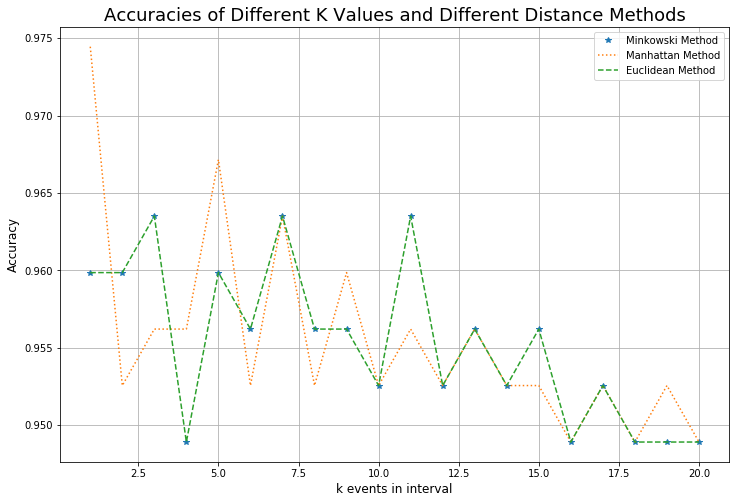

In [84]:
#plot accuracies of each KNN distance method

#configure plot
fig1 = plt.figure(figsize=(12, 8))
axes = fig1.add_subplot(111)

axes.plot(k_range, scores_a, '*', label = "Minkowski Method") # Minkowski Method
axes.plot(k_range, scores_b, ':', label = "Manhattan Method") # Manhattan Method
axes.plot(k_range, scores_c, '--', label = "Euclidean Method")# Euclidean Method

axes.legend(loc='upper right')
axes.grid(True, which='major', axis='x' )
axes.grid(True, which='major', axis='y' )
axes.set_ylabel("Accuracy", fontsize=12)
axes.set_xlabel("k events in interval", fontsize=12)
axes.set_title("Accuracies of Different K Values and Different Distance Methods", fontsize=18)

plt.show()

# Using KNN Made From Scratch

### KNN Utilizing Euclidean Distance

In [21]:
#define KNN classifier using Euclidean distances
def k_nearest_neighbors_euclidean(predict,data, k):
    #hold distance measurements
    distances = []
    #iterate through groups in predict and calculate distances
    for group in predict:
        for features in predict[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(data))
            distances.append([euclidean_distance, group])
    #iterate through the votes to find the most common ones        
    votes =  [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    #calculate confidence
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

### KNN Utilizing Manhattan Distance

In [22]:
#import distance library
from scipy.spatial import distance

#define KNN classifier using Manhattan distances
def k_nearest_neighbors_manhattan(predict,data, k): 
    #hold distance measurements    
    distances = []
    #iterate through groups in predict and calculate distances
    for group in predict:
        for features in predict[group]:
            calculated_distance = distance.cityblock(features, data)
            distances.append([calculated_distance, group])
    #iterate through the votes to find the most common ones                
    votes =  [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    #calculate confidence
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

### KNN Utilizing Manhattan Distance

In [23]:
#import distance library
from scipy.spatial import distance

#define KNN classifier using Euclidean distances
def k_nearest_neighbors_minkowski(predict,data, k):   
    #hold distance measurements
    distances = []
    #iterate through groups in predict and calculate distances
    for group in predict:
        for features in predict[group]:
            calculated_distance = distance.minkowski(features, data)
            distances.append([calculated_distance, group])
    #iterate through the votes to find the most common ones                
    votes =  [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    #calculate confidence
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

In [35]:
#ensure all data is numeric ~ float
full_data = df.astype(float).values.tolist()

In [36]:
test_size = 0.4

#2 in benign, 4 is malignant
train_set = {0:[], 1:[]}
test_set = {0:[], 1:[]}

#first 20% of data
train_data = full_data[:-int(test_size*len(full_data))]

#last 20% of data
test_data = full_data[-int(test_size*len(full_data)):]

In [37]:
#populate above dictionaries
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])    

### KNN Utilizing Minowski Euclidean

In [91]:
#run the KNN classifier using Euclidean distance for 1-20 neigbhors
correct = 0
total = 0
k_range = range(1,21)
scores1 = []
for k in k_range:
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors_euclidean(train_set, data, k)
            if group == vote:
                correct += 1
            total +=1
    scores1.append(correct/total)
print("The maximum calculated accuracy is",max(scores1),"." )

The maximum calculated accuracy is 0.9877289377289378 .


### KNN Utilizing Manhattan Distance

In [93]:
#run the KNN classifier using Manhattan distance for 1-20 neigbhors
correct = 0
total = 0
k_range = range(1,21)
scores2 = []
for k in k_range:
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors_manhattan(train_set, data, k)
            if group == vote:
                correct += 1
            total +=1
    scores2.append(correct/total)
print("The maximum calculated accuracy is",max(scores2),"." )

The maximum calculated accuracy is 0.9882783882783883 .


### KNN Utilizing Minowski Minkowski

In [92]:
#run the KNN classifier using Minkowski distance for 1-20 neigbhors
correct = 0
total = 0
k_range = range(1,21)
scores3 = []
for k in k_range:
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors_minkowski(train_set, data, k)
            if group == vote:
                correct += 1
            total +=1
    scores3.append(correct/total)
print("The maximum calculated accuracy is",max(scores3),"." )

The maximum calculated accuracy is 0.9877289377289378 .


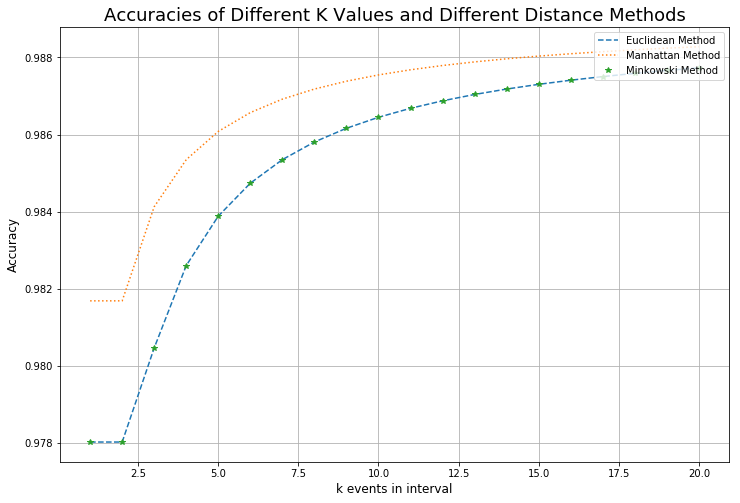

In [83]:
#plot accuracies of each KNN distance method

#configure plot
fig = plt.figure(figsize=(12, 8))
axes=fig.add_subplot(111)

axes.plot(k_range, scores1, '--', label = "Euclidean Method")# Euclidean Method
axes.plot(k_range, scores2, ':', label = "Manhattan Method") # Manhattan Method
axes.plot(k_range, scores3, '*', label = "Minkowski Method") # Minkowski Method

axes.legend(loc='upper right')
axes.grid(True, which='major', axis='x' )
axes.grid(True, which='major', axis='y' )
axes.set_ylabel("Accuracy", fontsize=12)
axes.set_xlabel("k events in interval", fontsize=12)
axes.set_title("Accuracies of Different K Values and Different Distance Methods", fontsize=18)

plt.show()

### 7. Conclusion
---
*(Briefly describe what you have done and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

### - After cleaning the data, a correlation matrix was created on top of the processed data. 

### - Uniformity of Cell Shape and Uniformity of Cell Size are highly correlated. This makes sense because the larger/smaller the shape of the cell, the larger/smaller the size of the cell.

### - In essence, we were able to find that the KNN classifier made from scratch performed better than the KNN classifier made by using Scikit Learn by a small margin. 

### - For both KNN implementations, Euclidean and Minowski distance methods shared the same accuracy results.

### - Our initial hypothesis was that the implementation utilizing the Scikit Learn library would be more accurate, however this was not the case, and therefore our initial hypothesis is rejected. 


### 8. References

- http://scikit-learn.org/stable/modules/neighbors.html
- https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/
- https://www.pythonprogramming.net/data-analysis-tutorials/

---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The following course outcomes will be checked against the content of the report:

Upon successful completion of this course, a student will be able to:
* Describe the key Python tools and libraries that related to a typical data analytics project. 
* Identify data science libraries, frameworks, modules, and toolkits in Python that efficiently implement the most common data science algorithms and techniques.
* Apply latest Python techniques in data acquisition, transformation and predictive analytics for data science projects.
* Discuss the underlying principles and main characteristics of the most common methods and techniques for data analytics. 
* Build data analytic and predictive models for real world data sets using existing Python libraries.

** Marking will be foucsed on both presentation and content.** 

## Written Presentation Requirements
The report will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as its contents. Please make sure that the text of your report is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

## Technical Content:
* Is the problem well defined and described thoroughly?
* Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
* Did the report describe the charactriatics of the data?
* Did the report describe the goals of the data analysis?
* Did the analysis conduct exploratory analyses on the data?
* Did the analysis build models of the data and evaluate the performance of the models?
* Overall, what is the rating of this project?